In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

In [66]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import optuna as op

In [67]:
df = pd.read_csv("bank.csv")
df['y'].value_counts()
#imbalanced datase

0    39298
1     5168
Name: y, dtype: int64

In [68]:
####### split dataset #######
x=df.drop('y', axis=1)
y=df['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1,train_size=0.7)
print(x_train.shape)
print(x_test.shape)

(31126, 32)
(13340, 32)


In [69]:
###### balance dataset (SMOTE) ######
smote=SMOTE(random_state=1) #Tuning parameters if needed
x_train, y_train = smote.fit_resample(x_train,y_train)
y_train.value_counts()

0    27557
1    27557
Name: y, dtype: int64

In [108]:
###### Random Forests ######
clf=RandomForestClassifier(n_estimators=100, max_features=6,min_samples_leaf=1, random_state=1)
#default settings 
# n_estimators=100
# max_depth=None
# min_samples_split=2
# min_samples_leaf=1
clf=RandomForestClassifier(random_state=1)
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(clf.score(x_test, y_test))

Accuracy:  0.8984257871064468
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11741
           1       0.60      0.48      0.53      1599

    accuracy                           0.90     13340
   macro avg       0.76      0.72      0.74     13340
weighted avg       0.89      0.90      0.89     13340

0.8984257871064468



Feature Gini Importance:
 duration             0.251783
housing_yes          0.094919
month_Summer         0.058767
balance              0.052553
day                  0.048866
marital_married      0.043951
age                  0.043480
month_Spring         0.042326
job_blue-collar      0.035777
pdays                0.034718
loan_yes             0.027233
job_technician       0.025828
campaign             0.025309
marital_single       0.025285
month_Winter         0.019545
education            0.018732
previous             0.018193
job_management       0.017539
poutcome_failure     0.016635
job_admin.           0.016570
job_services         0.016299
contact_cellular     0.010941
poutcome_success     0.008527
poutcome_other       0.006453
job_self-employed    0.006334
contact_telephone    0.006196
job_unemployed       0.006162
job_retired          0.005718
job_entrepreneur     0.005639
job_housemaid        0.005417
job_student          0.003227
default_yes          0.001077
dtype: float6

Text(0.5, 0, 'Random Forest Gini Importance')

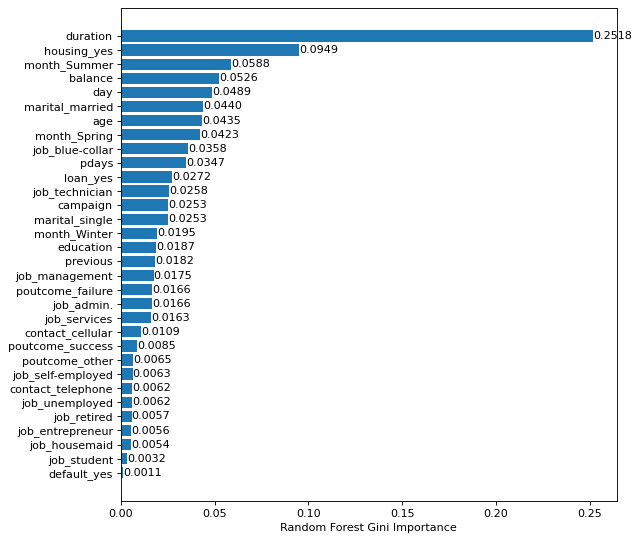

In [84]:
###### Feature Selection ######
importance= clf.feature_importances_
#print(importance)
feature_names=x_train.columns[0:]
#print(feature_names)
feature_imp = pd.Series(clf.feature_importances_, index = feature_names).sort_values(ascending = False)
print('\nFeature Gini Importance:\n',feature_imp)
sorted_idx=clf.feature_importances_.argsort()
plt.figure(figsize=(8,8), dpi=80)
bc=plt.barh(feature_names[sorted_idx], clf.feature_importances_[sorted_idx])
plt.bar_label(bc, label_type='edge', fmt='%0.4f')
plt.xlabel("Random Forest Gini Importance")

[[11221   520]
 [  835   764]]
Accuracy:  0.8984257871064468
Recall(TPR):  0.47779862414008756
Precision (PPV):  0.5950155763239875
False Negative Rate:  0.5222013758599124
False Positive Rate: 


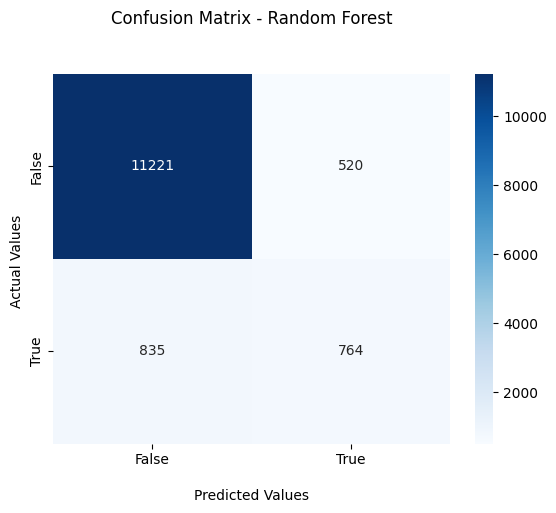

In [112]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Recall(TPR): ',metrics.recall_score(y_test, y_pred))
print('Precision (PPV): ',metrics.precision_score(y_test, y_pred))
print('False Negative Rate: ', 1-metrics.recall_score(y_test, y_pred))
print('False Positive Rate: ')

ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.20g')
ax.set_title('Confusion Matrix - Random Forest\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

ROC for Random Forest:  0.9137500446764836


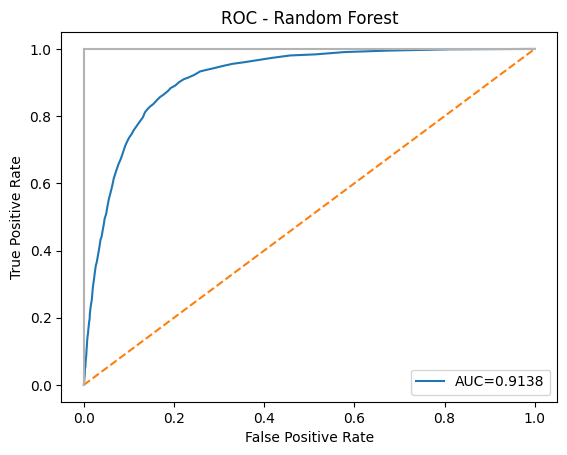

In [73]:
###### Visualization #####
#ROC
from sklearn.metrics import roc_curve, roc_auc_score
y_score=clf.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
auc=metrics.auc(false_positive_rate, true_positive_rate)
print('ROC for Random Forest: ', roc_auc_score(y_test, y_score))
plt.title('ROC - Random Forest')
plt.plot(false_positive_rate, true_positive_rate, label='AUC=%0.4f'%auc)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
########Here’s a bagged regression tree
clf=RandomForestClassifier(random_state=1)
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(clf.score(x_test, y_test))